In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
!pip3 -q install pytorch_lightning
!pip3 -q install test-tube

     |████████████████████████████████| 839kB 8.7MB/s 
     |████████████████████████████████| 184kB 15.2MB/s 
     |████████████████████████████████| 276kB 22.9MB/s 
     |████████████████████████████████| 112kB 28.2MB/s 
     |████████████████████████████████| 829kB 20.7MB/s 
     |████████████████████████████████| 1.3MB 41.8MB/s 
     |████████████████████████████████| 143kB 45.3MB/s 
     |████████████████████████████████| 296kB 45.0MB/s 


In [ ]:
import os
import sys
sys.path.append('/content/gdrive/MyDrive/11785_SceneDetection_Quantization')

import yaml
import test_tube

import torch
import numpy as np

import torch.backends.cudnn as cudnn
from pytorch_lightning import Trainer
from pytorch_lightning.loggers.test_tube import TestTubeLogger

In [ ]:
from model.BetaVAE import *
from utils.experiment import *
from utils.extract_latent_space import *

In [ ]:
%cd '/content/gdrive/MyDrive/11785_SceneDetection_Quantization'

/content/gdrive/MyDrive/DLproj


In [ ]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

torch.manual_seed(config['logging_params']['manual_seed'])
np.random.seed(config['logging_params']['manual_seed'])

cudnn.deterministic = True
cudnn.benchmark = False

tt_logger = TestTubeLogger(save_dir=config['logging_params']['save_dir'],
                           name=config['logging_params']['name'],
                           debug=False,
                           create_git_tag=False)
model = BetaVAE(**config['model_params'])
experiment = VAEXperiment(model, config['exp_params'])

In [ ]:
trainer = Trainer(default_root_dir=config['logging_params']['save_dir'],
                  num_sanity_val_steps=0,
                  logger = tt_logger,
                  **config['trainer_params'])

res = trainer.fit(experiment)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: GPU available but not used. Set the --gpus flag when calling the script.
  warnings.warn(*args, **kwargs)

  | Name  | Type    | Params
----------------------------------
0 | model | BetaVAE | 3.9 M 
----------------------------------
3.9 M     Trainable params
0         Non-trainable params
3.9 M     Total params
15.751    Total estimated model params size (MB)


epoch 1 {'avg_train_loss': 1.1181292533874512, 'avg_val_loss': 0.5864596366882324}
Save new model


epoch 2 {'avg_train_loss': 0.3573744773864746, 'avg_val_loss': 0.7666188478469849}


epoch 3 {'avg_train_loss': 0.11288961172103881, 'avg_val_loss': 0.48434966802597046}
Save new model


epoch 4 {'avg_train_loss': 0.04428154528141022, 'avg_val_loss': 0.6519235372543335}


epoch 5 {'avg_train_loss': 0.04582122564315796, 'avg_val_loss': 0.7139288783073425}


epoch 6 {'avg_train_loss': 0.07479498982429504, 'avg_val_loss': 1.3904621601104736}


epoch 7 {'avg_train_loss': 0.07081483006477356, 'avg_val_loss': 1.1718565225601196}


epoch 8 {'avg_train_loss': 0.12303383350372314, 'avg_val_loss': 2.997530221939087}


epoch 9 {'avg_train_loss': 0.14143891334533693, 'avg_val_loss': 2.3903207778930664}


epoch 10 {'avg_train_loss': 0.11411112546920776, 'avg_val_loss': 1.2496176958084106}



0 [0.7892834842205048, 0.7381669580936432, 0.1885593980550766, 0.4748459458351135, 0.47491395473480225, 0.10299838334321976, 0.11322146654129028, 0.6321065425872803, 0.11019222438335419, 0.09211286902427673, 0.42679382860660553, 0.1381528079509735, 0.4328265115618706, 0.29844649881124496]
1 [1.0401303470134735, 1.7220536768436432, 0.8670948594808578, 0.2655068039894104, 0.3381112813949585, 0.031015045940876007, 0.15329104661941528, 0.2265164852142334, 0.027630731463432312, 0.13909468054771423, 0.06629349291324615, 0.18508121371269226, 0.20160245150327682, 3.344047389924526]
2 [0.2939412295818329, 0.28425613045692444, 0.10569654405117035, 0.11149603128433228, 0.6795190572738647, 0.2076050117611885, 0.9733060002326965, 0.5967977046966553, 0.24287502467632294, 2.6766923367977142, 0.9028756767511368, 0.296493262052536, 0.7118639871478081, 3.655929408967495]
3 [3.428115576505661, 0.5689622461795807, 0.1680515855550766, 0.42507559061050415, 0.3365548849105835, 0.19873202592134476, 0.20682650

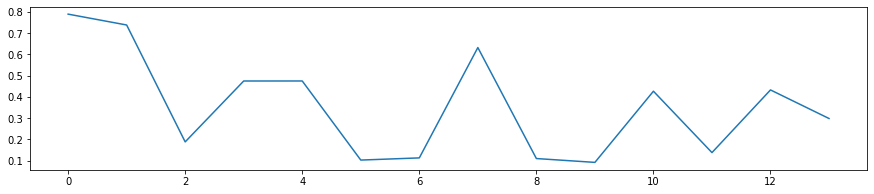

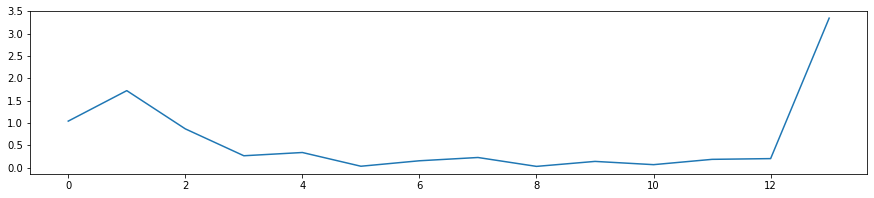

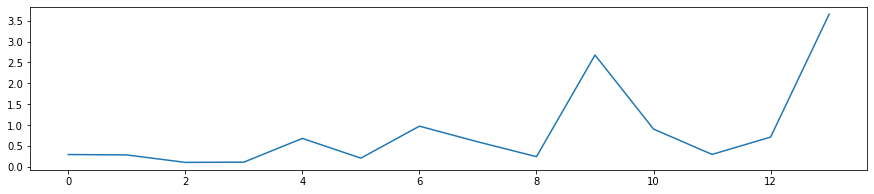

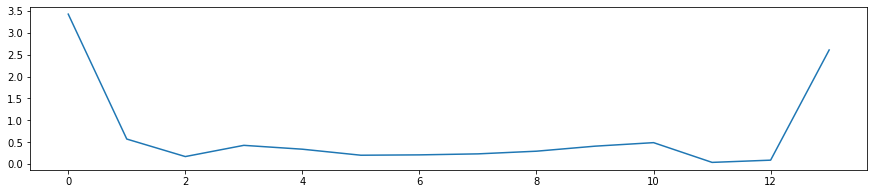

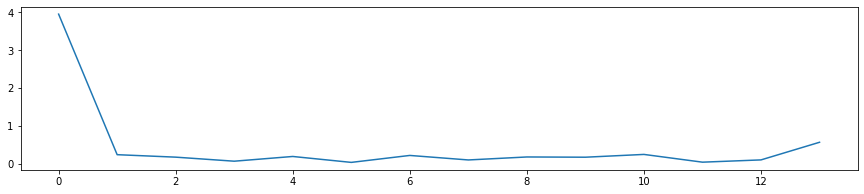

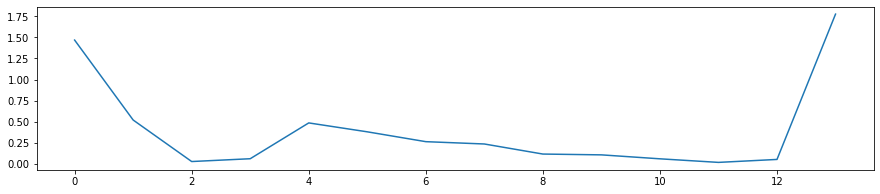

In [ ]:
#best_model = torch.load('./best_model/model')
#model.load_state_dict(best_model)
scene_KL_divergence(model, experiment.sample_dataloader)